# Multi Layer Perceptron (MLP)

## Importing the required libraries:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

## Creating a class for a multilayer perceptron (MLP):

In [ ]:
class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01, epochs=1000):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        self.weights = [
            np.random.randn(self.input_size, self.hidden_sizes[0]),
            np.random.randn(self.hidden_sizes[0], self.hidden_sizes[1]),
            np.random.randn(self.hidden_sizes[1], self.output_size),
        ]
        self.biases = [
            np.zeros((1, self.hidden_sizes[0])),
            np.zeros((1, self.hidden_sizes[1])),
            np.zeros((1, self.output_size)),
        ]
        
        # loss , accuracy
        self.loss_history = []
        self.accuracy_history = []

    def activation(self, x):
        return 1 / (1 + np.exp(-x))  
    
    def activation_derivative(self, x):
        return x * (1 - x)  

    def fit(self, X, y):
        for epoch in range(self.epochs):
            # Forwarding 
            z1 = np.dot(X, self.weights[0]) + self.biases[0]
            a1 = self.activation(z1)

            z2 = np.dot(a1, self.weights[1]) + self.biases[1]
            a2 = self.activation(z2)

            z3 = np.dot(a2, self.weights[2]) + self.biases[2]
            a3 = self.activation(z3)  

            
            loss = np.mean((y - a3) ** 2)
            self.loss_history.append(loss)

            # Back propagation
            error_output = (y - a3) * self.activation_derivative(a3)
            error_hidden2 = np.dot(error_output, self.weights[2].T) * self.activation_derivative(a2)
            error_hidden1 = np.dot(error_hidden2, self.weights[1].T) * self.activation_derivative(a1)

            self.weights[2] += np.dot(a2.T, error_output) * self.learning_rate
            self.biases[2] += np.sum(error_output, axis=0, keepdims=True) * self.learning_rate

            self.weights[1] += np.dot(a1.T, error_hidden2) * self.learning_rate
            self.biases[1] += np.sum(error_hidden2, axis=0, keepdims=True) * self.learning_rate

            self.weights[0] += np.dot(X.T, error_hidden1) * self.learning_rate
            self.biases[0] += np.sum(error_hidden1, axis=0, keepdims=True) * self.learning_rate

            predictions = self.predict(X)
            accuracy = np.mean(predictions == y)
            self.accuracy_history.append(accuracy)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}/{self.epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    def predict(self, X):
        a1 = self.activation(np.dot(X, self.weights[0]) + self.biases[0])
        a2 = self.activation(np.dot(a1, self.weights[1]) + self.biases[1])
        a3 = self.activation(np.dot(a2, self.weights[2]) + self.biases[2])
        return np.round(a3)  

    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

    def show_plt_loss_train_test_data(self):
        plt.figure(figsize=(12,6))
        plt.plot(self.loss_history, label="Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss Over Training")
        plt.legend()
        plt.show()

    def show_plt_accuracy_train_test_data(self):
        plt.figure(figsize=(12,6))
        plt.plot(self.accuracy_history, label="Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title("Accuracy Over Training")
        plt.legend()
        plt.show()


#### 1- Using the digits dataset from sklearn and defining X and Y.
#### 2- Converting Y to One-Hot encoding (e.g., 3 → 0010000000)
#### 3- Splitting the data into 80% for training and 20% for testing.

In [22]:
dataset  = load_digits()
X = dataset.data
Y = dataset.target
Y = np.eye(10)[Y]

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

### Setting the hyperparameters:

In [23]:
D_in = X_train.shape[1]
H1 = 128
H2 = 32
D_out = Y_train.shape[1]
epochs = 301
η = 0.0001

### Initializing the model and fitting the data:

In [24]:
model = MultiLayerPerceptron(D_in,(H1,H2),D_out,η,epochs)
model.fit(X_train,Y_train)

Epoch 0/301, Loss: 0.4776, Accuracy: 0.4299
Epoch 100/301, Loss: 0.0928, Accuracy: 0.8992
Epoch 200/301, Loss: 0.0873, Accuracy: 0.9032
Epoch 300/301, Loss: 0.0826, Accuracy: 0.9072


|Epoch |Loss | Accuracy|
|-----|-------|------|
|Epoch 0/301 |Loss: 0.4776 |Accuracy: 0.4299|
|Epoch 100/301 |Loss: 0.0928 |Accuracy: 0.8992
|Epoch 200/301|Loss: 0.0873 |Accuracy: 0.9032
|Epoch 300/301 |Loss: 0.0826 |Accuracy: 0.9072

### Displaying Loss and Accuracy:

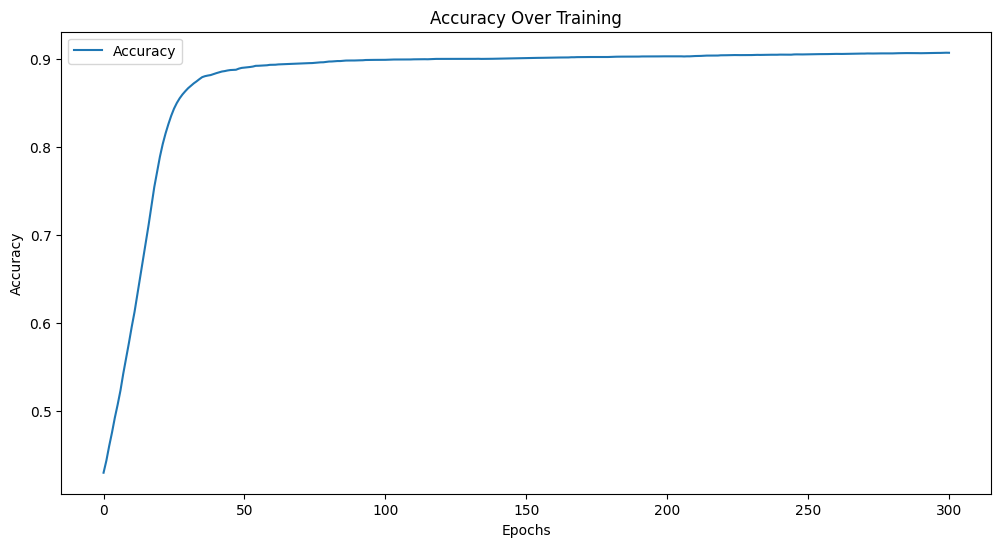

In [25]:
model.show_plt_accuracy_train_test_data()

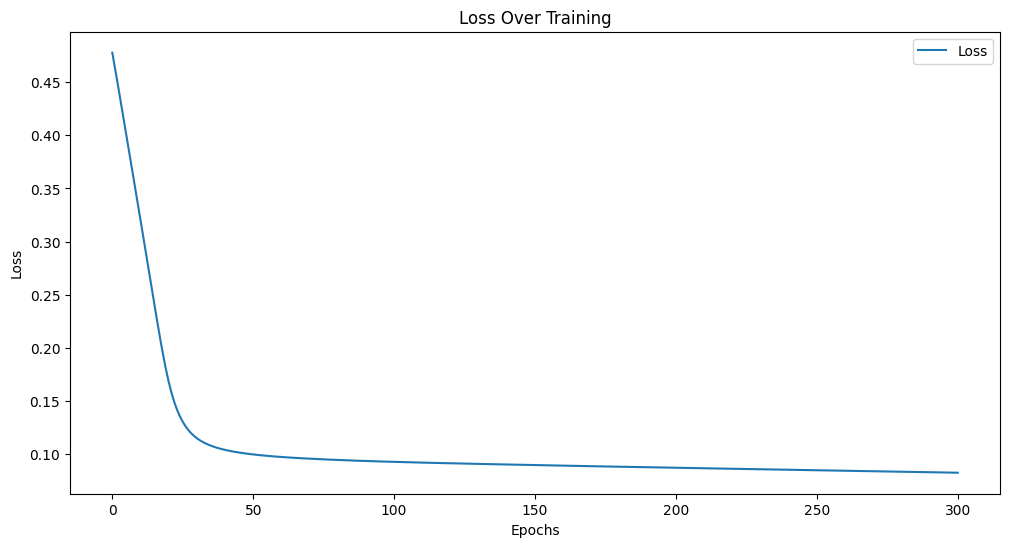

In [26]:
model.show_plt_loss_train_test_data()